# Machine Learning & Energy WS 20/21 - Exercise 2 - Part II: Combined Cycle Power Plant

**NOTE: Please additionally install scikit learn in our virtual environment:**
- Open the anaconda prompt
- type ``conda activate MLE`` and press enter
- type ``conda install scikit-learn`` and press enter

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import my_utils
import KNearestNeighborsRegression as knn
from sklearn.neighbors import KNeighborsRegressor

In this notebook we will use KNN regression to predict the power output of a combined cycle power plant (CCPP).
Building an exact thermodynamical model of the CCPP is rather complicated.
Here, machine learning can be used to build a statistical model in much less time.

Our goal is to predict the full load electrical power output $P$ in $MW$ of the CCPP using measurements for the ambient temperature $AT$ in $°C$, the atmospheric pressure $AP$ in $mbar$, the relative humidity $RH$ in in percentage, and the Vacuum $V$ in $cm Hg$.

<div style="text-align:center">
<img src="images/CCPP.png"/ width=700>

## 1. The data
#### a) Run the cell below to load the training data using the pandas library and to print the first few examples of the data set.

In [2]:
data_train = pd.read_csv("CCPP_train.csv", sep=";")
data_train.head(10)

,AT,V,AP,RH,P
0,29.56,71.14,1011.42,53.18,432.09
1,12.74,41.38,1021.92,56.67,475.63
2,18.48,52.05,1012.41,68.20,458.62
3,33.50,70.80,1008.99,57.24,433.19
4,16.23,43.72,1009.96,83.01,457.90
5,27.26,73.18,1012.58,74.83,429.92
6,32.11,78.05,1010.36,58.78,431.31
7,25.11,58.79,1015.99,60.55,442.34
8,7.24,41.17,1020.35,80.56,486.76
9,22.42,60.08,1017.71,67.46,452.31


#### b) Run the cell below. What does the plot tell you about the data?

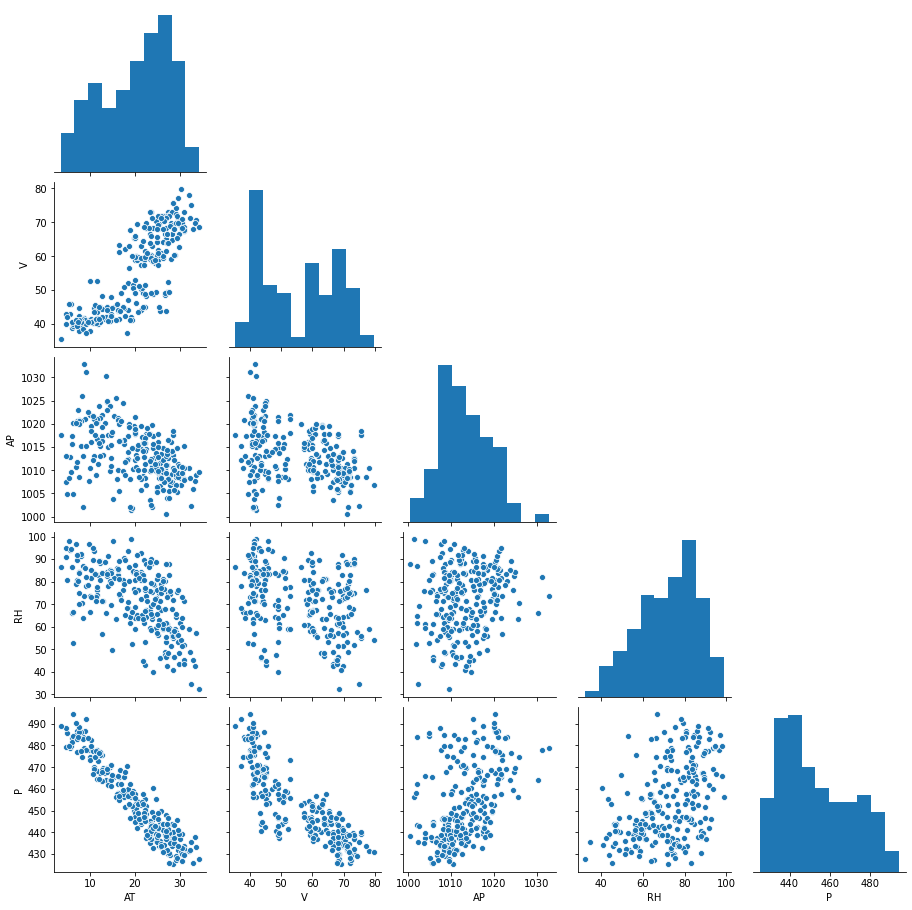

In [3]:
_=sns.pairplot(data_train, corner=True)

#### c) Complete the code in the cell below to create a matrix $\mathbf{X}_{train} \in \mathbb{R}^{N \times D}$ of inputs and a vector $\mathbf{y}_{train} \in \mathbb{R}^{N \times 1}$ of target values from the data in ``data_train``.
(HINT: To access to columns of a pandas dataframe ``df`` you can use ``df[["varname_1", "varname_2"]]``, to create numpy arrays from data frames you can use ``df.values``).

In [4]:
# ----------------- Add code here ----------------------
X_train = data_train[["V","AT","AP","RH"]].values
y_train = data_train[["P"]].values
#-------------------------------------------------------

Before passing the training data to the KNN algortihm, we have to normalize our inputs (these are also called *features*) s.t. they have the same scale.
#### d) Complete the function ``normalize_features()`` in the module ``my_utils``. 
Run the cell below to normalize $\mathbf{X}_{train}$ and to verify that all features now indeed have zero mean and a standard deviation of 1.

In [5]:
mu_X = np.mean(X_train, axis=0)
sigma_X = np.std(X_train, axis=0)
X_train = my_utils.normalize_features(X_train, mu_X, sigma_X)

print(f"Feature means: {np.mean(X_train, axis=0)}")
print(f"Feature standard deviations: {np.std(X_train, axis=0)}")

Feature means: [-2.65294257e-16  7.65786363e-17  3.73998021e-15 -8.82382075e-16]
Feature standard deviations: [1. 1. 1. 1.]


## 2. Setting K via cross validation

In the first notebook of this exercise we already saw that the number of neighbors can strongly influence the quality of our predictions.
The number of neighbors $k$ is an example for a *hyper parameter*.
The standard method to determine the optimal value $k_{opt}$ is crossvalidation.

<div style="text-align:center">
<img src="images/CV.png"/>

#### a) Complete the code for the function ``knn_cv()`` in the module ``KNearestNeighborsRegression``.
 The code runs cross validation with ``n_folds`` on the data in ``X`` and ``y`` for possible values for $k$ given in ``neighbors``.
 It returns the average RMSE for each $k$.
 
 Run the cell below to check your implementation.

Optimal value for k: 10 
(Should be 10) 



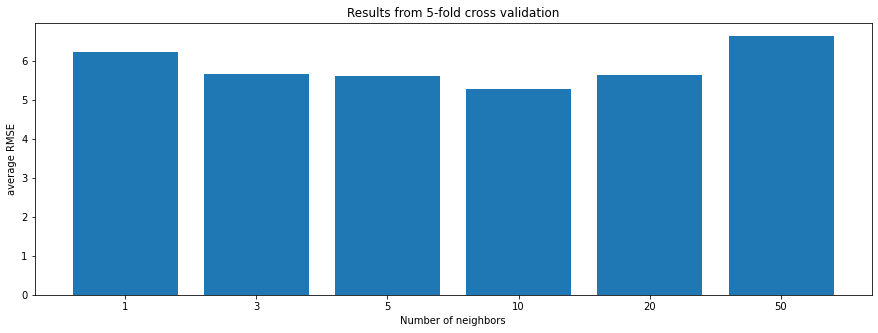

In [6]:
neighbors = [1,3,5,10,20,50]
n_folds = 5

rmse_cv = knn.knn_crossval(X_train, y_train, neighbors, n_folds)
k_opt = neighbors[np.argmin(rmse_cv)]

plt.figure(figsize=(15,5))
plt.bar(np.arange(0,len(neighbors)), rmse_cv)
plt.xticks(np.arange(0,len(neighbors)), neighbors)
plt.xlabel("Number of neighbors")
plt.ylabel("average RMSE")
_=plt.title(f"Results from {n_folds}-fold cross validation")

print(f"Optimal value for k: {k_opt} \n(Should be 10) \n")

Expected output:
<br>
<img src="images/cv_results.jpeg">

## 3. Testing on unseen data
Now we are ready to make predictions on unseen data, the so called *test data* or *test set*.
#### a) Complete the code in the cell below to load the test data from ``CCPP_test.csv`` using pandas and create the matrices X_test and y_test.
Don't forget to normalize the data in X_test. Why should you use the means and standard deviations from the training data here?

In [7]:
data_test = pd.read_csv("CCPP_test.csv", sep=";")
# ----------------- Add code here ----------------------
X_test = np.random.normal(size=(len(data_test),4)) # <-- change this
y_test = np.random.normal(size=(len(data_test),1)) # <-- change this
# -------------------------------------------------------

#### b) Complete the code in the cell below: Make predictions for the test data with using $k_{opt}$ and compute the RMSE for the predictions.

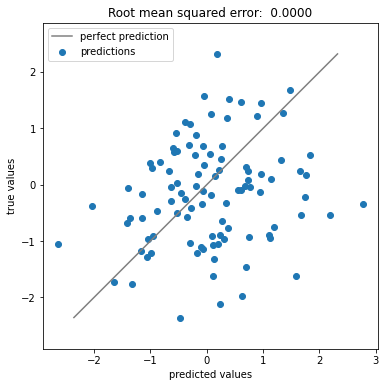

In [8]:
# ----------------- Add code here ----------------------
y_pred = np.random.normal(size=(len(data_test),1)) # <-- change this
rmse_test = 0.0 # <-- change this
# -------------------------------------------------------

plt.figure(figsize=(6,6))
plt.plot([np.min(y_test),np.max(y_test)], [np.min(y_test),np.max(y_test)], color="gray", label="perfect prediction")
plt.scatter(y_pred, y_test, label="predictions")
plt.xlabel("predicted values")
plt.ylabel("true values")
plt.title(f"Root mean squared error: {rmse_test: .4f}")
plt.axis("equal")
_=plt.legend()


Expected output:
<br>
<img src="images/results1.jpeg"/>

#### c) Use the scikit learn implemenation for KNN regression to verify your results.
Check the documentation to find out how to use it:
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

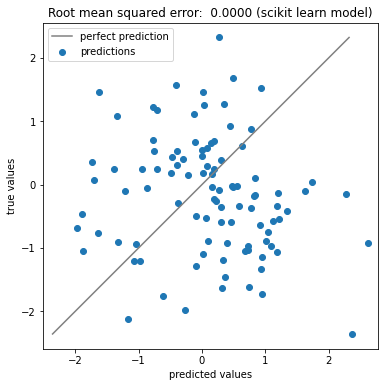

In [9]:
# ----------------- Add code here ----------------------


y_pred_skl = np.random.normal(size=(len(data_test),1)) # <-- change this
rmse_test_skl = 0.0 # <-- change this
# -------------------------------------------------------

plt.figure(figsize=(6,6))
plt.plot([np.min(y_test),np.max(y_test)], [np.min(y_test),np.max(y_test)], color="gray", label="perfect prediction")
plt.scatter(y_pred_skl, y_test, label="predictions")
plt.xlabel("predicted values")
plt.ylabel("true values")
plt.title(f"Root mean squared error: {rmse_test_skl: .4f} (scikit learn model)")
plt.axis("equal")
_=plt.legend()


Expected output:
<br>
<img src="images/results1.jpeg"/>

That's it! You just successfully finished your first machine learning project :)